In [1]:
import pandas as pd
from PIL import Image
import base64
from io import BytesIO

In [2]:
total_df = pd.read_csv('total_300k.tsv', delimiter='\t', header=None, quoting=3, keep_default_na=False)
total_df['merged'] = total_df.iloc[:,2:8].agg(lambda x: '\t'.join(x), axis=1)
total_df

,0,1,2,3,4,5,6,7,8,9,merged
0,2935782,1942925,Portable Wrench Holder,Klutch 15-Slot Universal Wrench Pouch,Sturdy Klutch fabric pouch is ideal for organi...,northerntool.com,Northern Tool,Klutch,1,[IMG_CATEID_3746],Portable Wrench Holder\tKlutch 15-Slot Univers...
1,1509963,2812118,what do skin tags look like on the face,TAG OFF Skin Natural Skin Tag Remover Take Ski...,"Tag OFF ""Skin Tag Remover"" is a topical remedy...",overstock.com,Overstock.com,Other,0,[IMG_CATEID_2584],what do skin tags look like on the face\tTAG O...
2,4509227,4665926,fuel gauges,Harley-Davidson Skull LED Fuel Gauge,This low-profile fuel gauge replaces the analo...,harley-davidson.com,Harley-Davidson,HARLEY-DAVIDSON,1,[IMG_CATEID_3323],fuel gauges\tHarley-Davidson Skull LED Fuel Ga...
3,1480602,2156357,horseshoe purse,CHANEL Frt Pocket Handbag Quilted Patent Leath...,Manufacturer: Chanel Material: Black Quilted P...,tradesy.com,Tradesy,Chanel,0,[IMG_CATEID_843],horseshoe purse\tCHANEL Frt Pocket Handbag Qui...
4,4253880,1562646,DELL LAPTOP DOCKING STATION TRIPLE MONITOR,"Dell WD15 Monitor Dock 4K with 180W Adapter, U...",3x SuperSpeed USB 3.0; 2x USB 2.0. Designed Fo...,amazon.com,Amazon.com,Dell,0,[IMG_CATEID_892],DELL LAPTOP DOCKING STATION TRIPLE MONITOR\tDe...
...,...,...,...,...,...,...,...,...,...,...,...
299037,4205222,2641396,mens black denim vest,Wrangler Men's ® Knit Vest (Size: XL) Black,High-quality fleece vest. Enjoy the soft warmt...,offeredby.net,Wrangler,Wrangler,0,[IMG_CATEID_3829],mens black denim vest\tWrangler Men's ® Knit V...
299038,482356,1600347,burberry outlet,Burberry Icon Stripe E-canvas and Leather Card...,A compact card case in leather and Icon stripe...,burberry.com,Burberry,Burberry,1,[IMG_CATEID_641],burberry outlet\tBurberry Icon Stripe E-canvas...
299039,3170630,3024956,2016 ford f150 tailgate trim,"2016 Ford F-250 Super Duty Tailgate Molding, D...","2016 Ford F-250 Super Duty Tailgate Molding, D...",jcwhitney.com,JC Whitney,Dorman,0,[IMG_CATEID_3873],2016 ford f150 tailgate trim\t2016 Ford F-250 ...
299040,3609034,721689,battery for 2005 suzuki gsxr 1000,YTX20L-BS Battery Replacement for BRP Honda Su...,YTX20L-BS Battery Replacement for BRP Honda Su...,bizrate.com,Walmart.com,Mighty Max Battery,0,[IMG_CATEID_4080],battery for 2005 suzuki gsxr 1000\tYTX20L-BS B...


In [2]:
images_df = pd.read_csv('image_base64.tsv', delimiter='\t', header=None)
images_df

,0,1
0,980,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...
1,1565,/9j/4AAQSkZJRgABAQEAAAAAAAD/2wBDAAsJCQcJCQcJCQ...
2,2700,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAw...
3,3267,/9j/4AAQSkZJRgABAQEAAAAAAAD/2wBDAAsJCQcJCQcJCQ...
4,5027,/9j/4AAQSkZJRgABAQEAAAAAAAD/2wBDAAsJCQcJCQcJCQ...
...,...,...
288124,4801578,/9j/4AAQSkZJRgABAQEAAAAAAAD/2wBDAAsJCQcJCQcJCQ...
288125,4807143,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAw...
288126,4808390,/9j/4AAQSkZJRgABAQEAAAAAAAD/2wBDAAsJCQcJCQcJCQ...
288127,4810008,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...


In [4]:
def getImageBin(n):
    return images_df[images_df[0] == total_df[0][n]][1].values[0]

In [5]:
def getImage(imageBin):
    imgdata = base64.b64decode(imageBin)
    return Image.open(BytesIO(imgdata))

In [6]:
def show(n):
    display(getImage(getImageBin(n)))

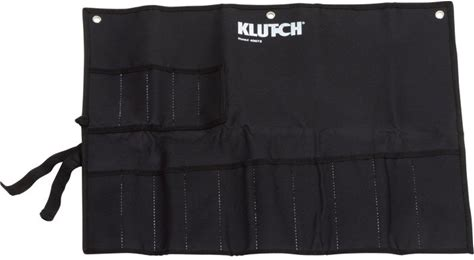

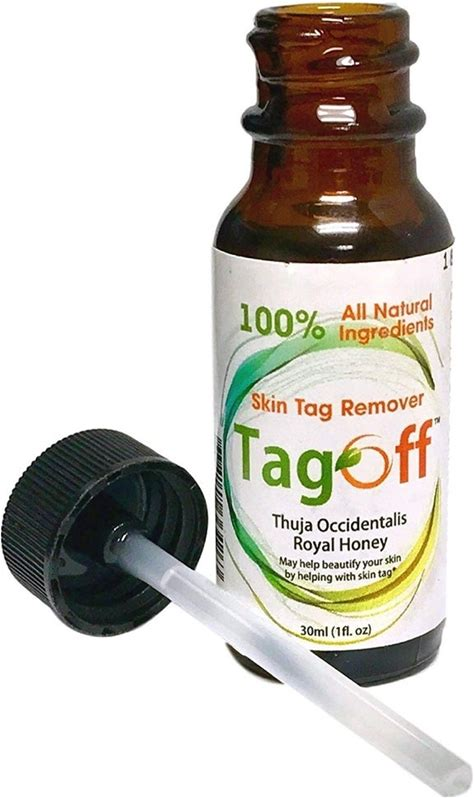

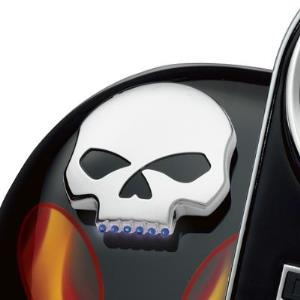

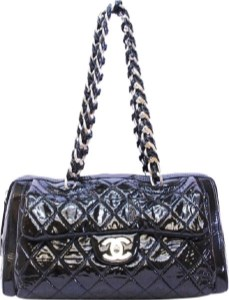

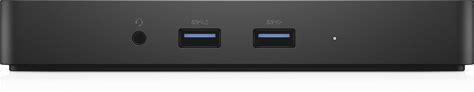

In [7]:
for i in range(5):
    show(i)

In [9]:
for row in images_df.iterrows():
    image = getImage(row[1][1]).convert('RGB')
    if image.width > 200:
        image = image.resize((200, 200*image.height//image.width), Image.ANTIALIAS)
    image.save(f'./images_compressed_200/{row[1][0]}.jpg', optimize=True)

C:\Users\smyig\AppData\Local\Temp\ipykernel_85328\2979008136.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((200, 200*image.height//image.width), Image.ANTIALIAS)


In [8]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-mpnet-base-v2')

C:\Users\smyig\Documents\Code\env_py310\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [9]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from langchain_core.documents import Document

In [10]:
index = faiss.IndexFlatL2(len(embeddings.embed_query('hello world')))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [ ]:
import time

# vector_store.index.reset()
vector_store.delete(ids=total_df.index.astype(str).tolist())

start_time = time.perf_counter()
vector_store.add_documents(
    documents=total_df[[0, 'merged']].apply(lambda x: Document(
        page_content=x['merged'],
        metadata={'image_id': str(x[0])},
    ), axis=1).values,
    ids=total_df.index.astype(str).tolist()
)
end_time = time.perf_counter()
print(f"Elapsed time: {end_time - start_time} seconds")

In [ ]:
vector_store.save_local('./')

In [12]:
vector_store = FAISS.load_local(
    './', embeddings, allow_dangerous_deserialization=True
)

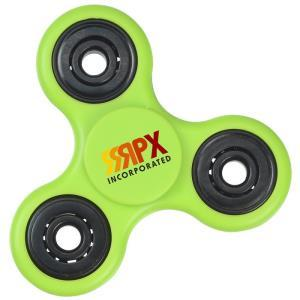

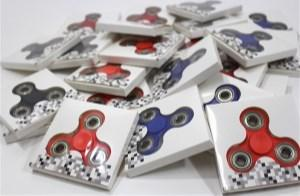

In [13]:
results = vector_store.similarity_search(
    'Fidget spinners',
    k=2,
)
for res in results:
    display(Image.open(f'./images/{res.metadata["image_id"]}.jpg'))
    # print(f"* {res.page_content} [{res.metadata}]")

In [14]:
from langchain_unstructured import UnstructuredLoader

In [15]:
page_url = 'https://lifehacker.com/money/never-buy-home-next-door-to-these-property-types'
loader = UnstructuredLoader(web_url=page_url)

docs = []
for doc in loader.lazy_load():
    docs.append(doc)

In [16]:
for doc in docs[:20]:
    print(f'{doc.metadata["category"]}: {doc.page_content}')

Title: Home Money Housing
ListItem: Copied
Title: Never Buy a House Next Door to These Types of Properties
NarrativeText: When you're buying your dream home, check what you're moving next to.
Title: Jeff Somers
Title: November 19, 2024
Title: Credit: Rawpixel.com/Shutterstock
NarrativeText: House hunting can be exciting—and frustrating. It can take anywhere from four weeks to six months (or longer!) to find and buy a house, and there’s likely going to be some compromise along the way. Your wish list will meet your budget, your patience will meet its limits, and before you know it you’re happily putting in an offer on a house that doesn’t have something you originally thought was a must-have.
NarrativeText: One aspect of a house that people sometimes overlook is what’s next door. While you can’t always know what kind of neighbors are living in homes next to yours, there are some other kinds of properties that might seem innocuous or even kind of cool at first—but aren’t. If you’re consi

The Single Woman's Guide To Real Estate: All You Need To Buy Your


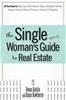

Web Enabled House for Sale Sign + Website - Laser Printed High Visibility Home for Sale by Owner Sign - Large 2 Sided 18" x 24" House for Sale Yard Signage - The Evolved Real Estate for Sale Sign!


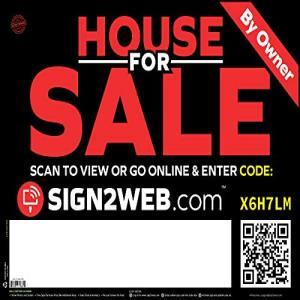

Portfolio Clipboard Horizontal Black (), Size: 9


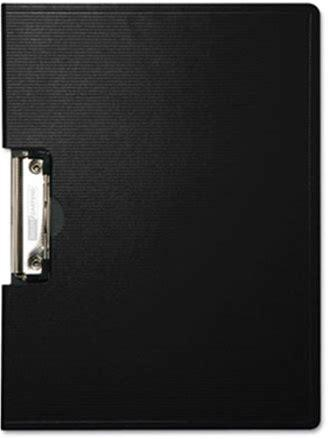

SuperMediaStore 1 to 5 DVD Duplicator (Economic Line) built-in Asus 24


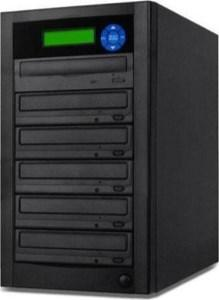

Real Estate Market Analysis Trends, Methods, And Information So...


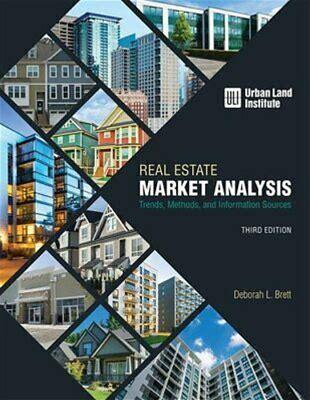

In [17]:
uniqueSet = set()
num_of_images = 5
count = 0
for doc in docs:
    results = vector_store.similarity_search(doc.page_content, k=2)
    for res in results:
        if res.metadata["image_id"] not in uniqueSet:
            uniqueSet.add(res.metadata["image_id"])
            print(res.page_content.split('\t')[1])
            display(Image.open(f'./images/{res.metadata["image_id"]}.jpg'))
            count += 1
            if count == num_of_images:
                break
    else:
        continue
    break

In [2]:
import zipfile

In [4]:
with zipfile.ZipFile('./images.zip', 'r') as zip_ref:
    zip_ref.extractall()

NameError: name 'image' is not defined